# <h1 align=center> **EDA ML-OPS** </h1>
Cargar los DataFrames apaetir de los archivos parquet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suprimir todos los warnings
# Cargar los DataFrames desde los archivos parquet
games=pd.read_parquet("games.parquet")
items=pd.read_parquet("items.parquet")
reviews=pd.read_parquet("reviews.parquet")

Combinar mediante la funcio  Merge los DataFrames 'games' y 'reviews' utilizando la columna 'item_id' como clave

In [2]:

merged_df = pd.merge(games, reviews, on='item_id')

Gráfico de dispersión para ver la relación entre año y precio

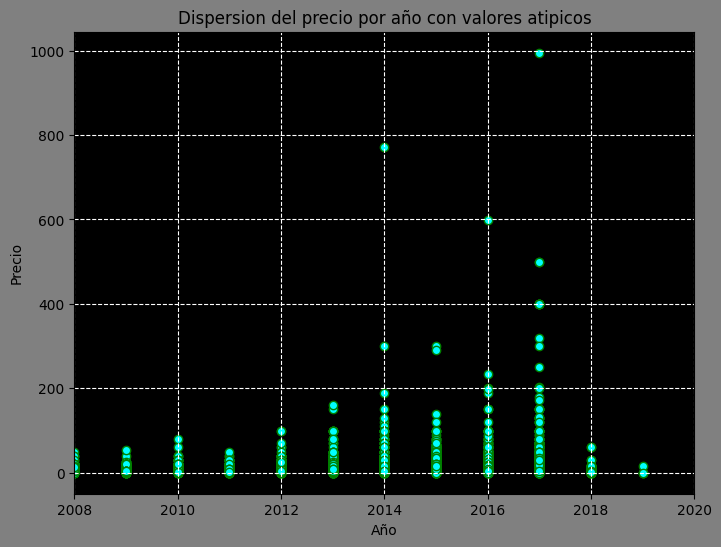

In [19]:
import matplotlib.pyplot as plt

# Cambia el color de fondo del gráfico
plt.figure(facecolor='gray', figsize=(8, 6), dpi=100,frameon=True)
plt.scatter(games['año_lanzamiento'], games['price'], c='aqua',edgecolor='Green')
sns.set_style(rc={'axes.facecolor': 'brown', 'figure.facecolor':'gray'})
plt.xlabel('Año')
plt.xlim(2008, 2020)
plt.ylabel('Precio')
plt.title('Dispersion del precio por año con valores atipicos')
plt.grid(color='white', linestyle='--')
plt.show()

Observamos las medidas estadísticas descriptivas para la columna precio

In [4]:
games['año_lanzamiento'].describe()

count    32133.00000
mean      1878.99860
std        505.63735
min          0.00000
25%       2014.00000
50%       2016.00000
75%       2017.00000
max       5275.00000
Name: año_lanzamiento, dtype: float64

Identificamos outliers en la columna precio y los eliminamos 

In [5]:
# Calcula el primer y tercer cuartil de price
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)
IQR = Q3 - Q1 # Calcula el rango intercuartílico (IQR)
# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Elimina filas con outliers en price
df_games_sinoutlaiers = games[(games['price'] >= lower_bound) & (games['price'] <= upper_bound)]
df_games_sinoutlaiers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30259 entries, 0 to 32132
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   30259 non-null  object 
 1   tags                       30259 non-null  object 
 2   price                      30259 non-null  float64
 3   item_id                    30259 non-null  int64  
 4   developer                  30259 non-null  object 
 5   año_lanzamiento            30259 non-null  int64  
 6   Accounting                 30259 non-null  int64  
 7   Action                     30259 non-null  int64  
 8   Adventure                  30259 non-null  int64  
 9   Animation &amp; Modeling   30259 non-null  int64  
 10  Audio Production           30259 non-null  int64  
 11  Casual                     30259 non-null  int64  
 12  Design &amp; Illustration  30259 non-null  int64  
 13  Early Access               30259 non-null  int64  


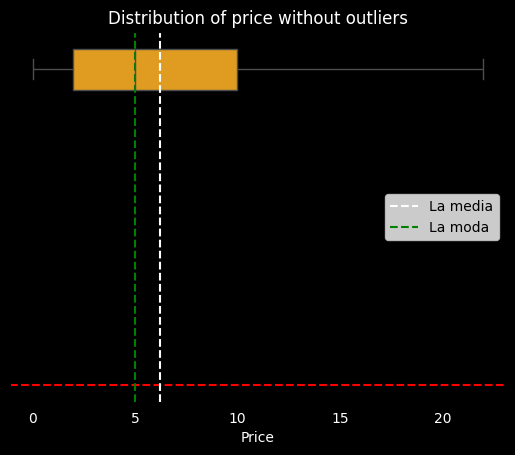

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a boxplot of price and highlight outliers
sns.boxplot(x=df_games_sinoutlaiers['price'].values, color='orange')
plt.title('Distribution of price without outliers', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('', color='white')
plt.gca().yaxis.set_visible(False)
mean_price = df_games_sinoutlaiers['price'].mean()
plt.axhline(mean_price, color='red', linestyle='--')
plt.axvline(mean_price, color='white', linestyle='--', label='La media')
plt.legend(labelcolor='white', facecolor='black')

# Set the color of the outliers to red
outliers = df_games_sinoutlaiers[~df_games_sinoutlaiers['price'].between(lower_bound, upper_bound)]
sns.scatterplot(x=outliers['price'].values, y=outliers.index, color='red')
plt.xticks(color='white')
plt.yticks(color='white')
moda_price = df_games_sinoutlaiers['price'].mode()[0]
plt.axvline(moda_price, color='green', linestyle='--', label='La moda')
plt.legend( facecolor='white')

plt.show()

TOP de juegos Populares

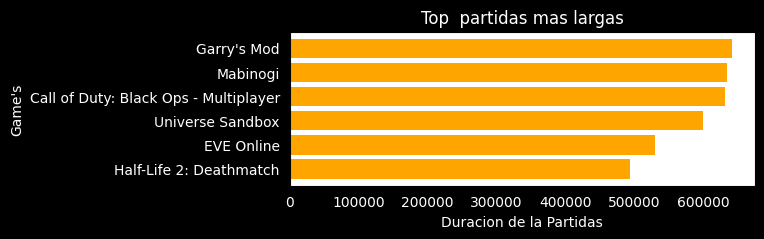

In [17]:
Populares = items.sort_values(by='playtime_forever', ascending=False).head(10)
plt.figure(figsize=(6, 2))  # Ajusta el tamaño del gráfico..
# Graficar los datos
plt.barh(Populares['item_name'], Populares['playtime_forever'], color='ORANGE')
sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'black'})
plt.xlabel('Duracion de la Partidas',color='white')  # Etiqueta del eje X
plt.ylabel("Game's",color='white')         # Etiqueta del eje Y
plt.title('Top  partidas mas largas',color='white')  # Título del gráfico
plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.
plt.xticks(color='white')
plt.yticks(color='white')
plt.show() # Mostrar el gráfico

Frecuencia de genero en video juegos de Steam

In [8]:
# Convierte las columnas a tipo int32
genres_list = ['Accounting','Action', 'Adventure', 'Animation &amp; Modeling','Casual','Design &amp; Illustration', 'Early Access','Education','Free to Play', 'Indie', 'Massively Multiplayer','Photo Editing', 'RPG', 'Racing', 'Simulation','Software Training', 'Sports', 'Strategy','Utilities', 'Video Production', 'Web Publishing']
for i in genres_list:
    games[i] = games[i].astype('int32')

In [9]:
# Define una funcion de conteo
def frequency_counter(df, lista):
    aux_list = []
    for i in lista:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux_list = dict(aux_list)
    counter_aux_list = Counter(aux_list)
    return counter_aux_list

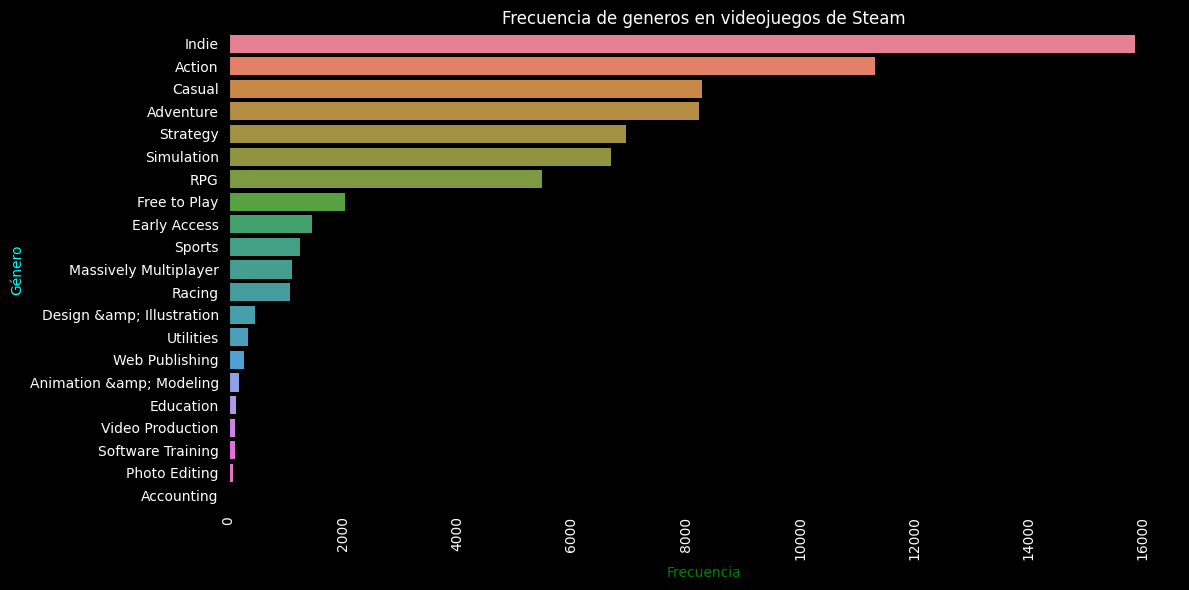

In [10]:
# Crea y ordena el DataFrame por los valores de frecuencia en orden descendente
counter_aux_list_2 = frequency_counter(games, genres_list)
datos = counter_aux_list_2
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frecuencia'])
datos = datos.sort_values(by='Frecuencia', ascending=False)
# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=datos.index, data=datos,palette="husl")
sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'gray'})
sns.set_palette(['orange', 'aqua'])
# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)
sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'black'})
# Etiquetas y título
plt.xlabel('Frecuencia',color='Green')
plt.ylabel('Género',color='cyan')
plt.title('Frecuencia de generos en videojuegos de Steam',color='white')
# Muestra el gráfico
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()

Proporción reseñas positivas vs negativas

In [11]:
# Conviertimos los valores booleanos de recommend a valores numéricos
reviews['recommend'] = reviews['recommend'].astype(int)

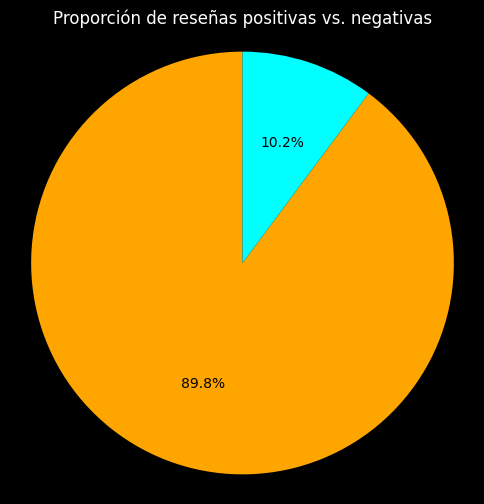

In [12]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.
# Contar el número de reseñas positivas y negativas
num_positivas = len(reviews[reviews['recommend'] == 1])
num_negativas = len(reviews[reviews['recommend'] == 0])
sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'black'})
# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title('Proporción de reseñas positivas vs. negativas',color='white')  # Título del gráfico
# Mostrar el gráfico
plt.show()

Distribución de Análisis de Sentimiento

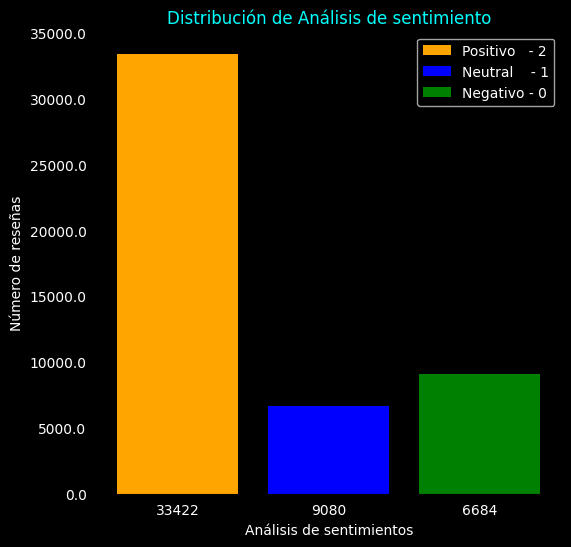

In [13]:
import matplotlib.pyplot as plt
# Calcula el número de reseñas positivas, negativas y neutrales
num_positivas = len(reviews[reviews['sentiment_analysis'] == 2])
num_negativas = len(reviews[reviews['sentiment_analysis'] == 1])
num_neutrales = len(reviews[reviews['sentiment_analysis'] == 0])
# Crear el gráfico de barras
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.
plt.bar(['Positivo', 'Neutral', 'Negativo'], [num_positivas,  num_neutrales, num_negativas], color=['orange', 'blue', 'green'], label=['Positivo   - 2', 'Neutral    - 1', 'Negativo - 0'])
# Agregar la leyenda al gráfico
plt.legend(labelcolor=['white'])
# Etiquetar el eje X
plt.gca().set_xlabel('Análisis de sentimientos', color='white')
# Etiquetar el eje Y
plt.gca().set_ylabel('Número de reseñas', color='white')
# Título del gráfico
plt.gca().set_title('Distribución de Análisis de sentimiento', color='cyan')
# Mostrar los valores de cada columna en el gráfico
plt.gca().xaxis.set_ticklabels([num_positivas, num_negativas, num_neutrales], color='white')
plt.gca().yaxis.set_ticklabels(plt.gca().get_yticks(), color='white')
# Mostrar el gráfico
plt.show()

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   32133 non-null  object 
 1   tags                       32133 non-null  object 
 2   price                      32133 non-null  float64
 3   item_id                    32133 non-null  int64  
 4   developer                  32133 non-null  object 
 5   año_lanzamiento            32133 non-null  int64  
 6   Accounting                 32133 non-null  int32  
 7   Action                     32133 non-null  int32  
 8   Adventure                  32133 non-null  int32  
 9   Animation &amp; Modeling   32133 non-null  int32  
 10  Audio Production           32133 non-null  int64  
 11  Casual                     32133 non-null  int32  
 12  Design &amp; Illustration  32133 non-null  int32  
 13  Early Access               32133 non-null  int

Top de los 3 desarrolladores con más juegos recomendamos en 2017

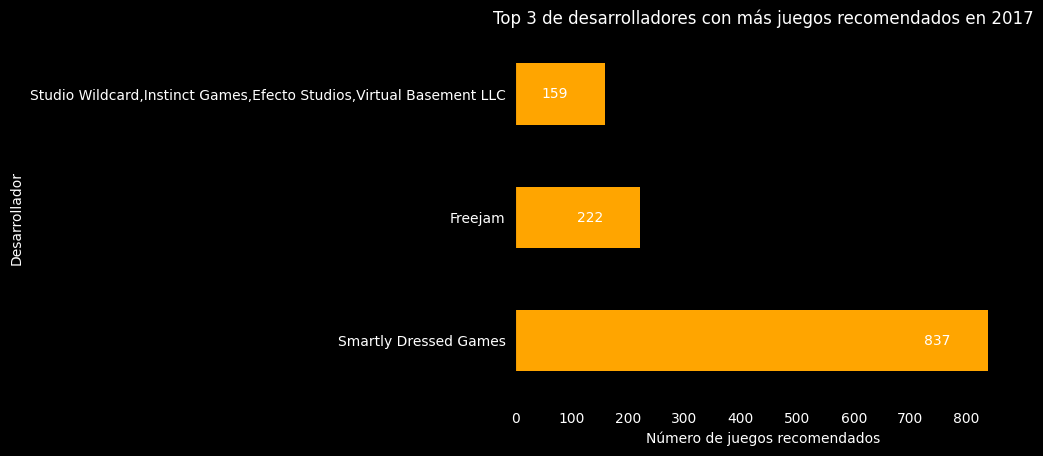

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los juegos por año y por recomendación positiva
df_year = merged_df[(merged_df['año_lanzamiento'] == 2017) & (merged_df['recommend'] == True)]

# Contar el número de juegos recomendados por desarrollador y devolver los tres primeros desarrolladores
top_desarrolladores = df_year['developer'].value_counts().head(3)

sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'black'})

# Crear un gráfico de barras horizontales que muestre el número de juegos recomendados por desarrollador
ax = top_desarrolladores.plot.barh(color="orange")

# Cambiar el color de las etiquetas de los valores a blanco para un mayor contraste
for patch in ax.containers[0]:
    ax.text(patch.get_width() - 113, patch.get_y() + patch.get_height() / 2,
            patch.get_width(), ha='left', va='center', color='white')

# Set the title, xlabel, and ylabel with white color
ax.set_title('Top 3 de desarrolladores con más juegos recomendados en 2017', color='white')
ax.set_xlabel('Número de juegos recomendados', color='white')
ax.set_ylabel('Desarrollador', color='white')

# Change the color of the x and y tick labels to white
ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='white')

plt.show()

Los 6 Juegos más Populares

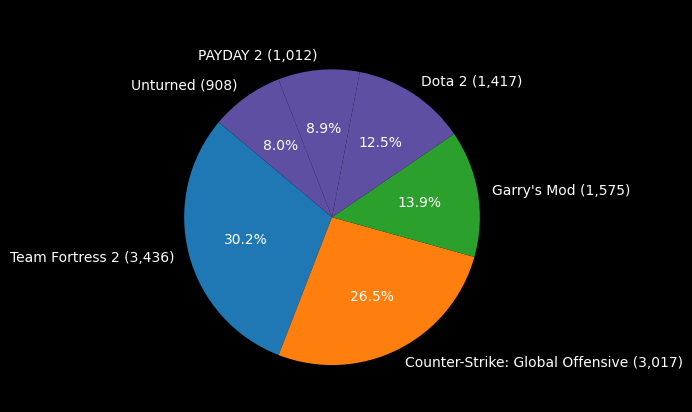

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
# Obtengo el Top seis
top_recomendados = (
    merged_df.groupby('app_name')['recommend']
    .agg('count')
    .reset_index(name='count')
    .nlargest(6, 'count')
)
sns.set_style(rc={'axes.facecolor': 'white', 'figure.facecolor':'black'})
# Obtenemos las variables que utilizare para etiquetar las porciones del pastel
app_names = top_recomendados['app_name'].tolist()
counts = top_recomendados['count'].tolist()
# Crea una lista de etiquetas para cada pieza del gráfico
labels = [f"{app_name} ({count:,})" for app_name, count in zip(app_names, counts)]
 # instanciamos la paleta de colores
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#5e4fa2', '#5e4fa2', '#5e4fa2']
# se construye una grafica de pastel
plt.pie(counts, labels=labels, colors=colores, autopct='%1.1f%%', startangle=140,textprops={'color': 'white'})
plt.title("Los 6 juegos más recomendados")
plt.figure(facecolor='white')
plt.show()